In [26]:
#prepare the environment
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn

import sklearn
pd.show_versions()
#matplotlib.__version__
sklearn.__version__


INSTALLED VERSIONS
------------------
commit           : None
python           : 3.7.3.final.0
python-bits      : 64
OS               : Darwin
OS-release       : 17.7.0
machine          : x86_64
processor        : i386
byteorder        : little
LC_ALL           : None
LANG             : en_US.UTF-8
LOCALE           : en_US.UTF-8

pandas           : 1.0.3
numpy            : 1.18.1
pytz             : 2020.1
dateutil         : 2.8.1
pip              : 20.0.2
setuptools       : 46.4.0.post20200518
Cython           : 0.29.17
pytest           : 5.4.2
hypothesis       : 5.11.0
sphinx           : 3.0.3
blosc            : None
feather          : None
xlsxwriter       : 1.2.8
lxml.etree       : 4.5.0
html5lib         : 1.0.1
pymysql          : None
psycopg2         : None
jinja2           : 2.11.2
IPython          : 7.13.0
pandas_datareader: None
bs4              : 4.9.0
bottleneck       : 1.3.2
fastparquet      : None
gcsfs            : None
lxml.etree       : 4.5.0
matplotlib       : 3.1.3
nu

'0.22.1'

In [27]:
!ls


Untitled.ipynb
Untitled1.ipynb
Untitled2.ipynb
my_model.pkl
week10_percepton.ipynb
week1_lr.ipynb
week1_numpy.py
week2_lr_pandas.ipynb
week4_model_training.ipynb
week7_ensemble_learning_and_random_forests.ipynb


In [28]:
#load the data
from sklearn.datasets import load_boston
boston_dataset = load_boston()
print(type(boston_dataset))

<class 'sklearn.utils.Bunch'>


In [29]:
#explore the data
print(boston_dataset.keys())
print(boston_dataset['feature_names'])
print(boston_dataset['DESCR'])


dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employ

Let's look at how the number of rooms (RM) affects the price (MEDV)
In our linear regression, MEDV will be our Y value.  RM will be our X value.  

In [30]:
#prepare the data
from sklearn.model_selection import train_test_split
num_Rooms_Train, num_Rooms_Test, med_price_Train, med_Price_Test = train_test_split(boston_dataset.data[:,5].reshape(-1,1), boston_dataset.target.reshape(-1,1))
print(num_Rooms_Train.shape)
print(med_price_Train.shape)
print(num_Rooms_Test.shape)
print(num_Rooms_Test[0])

(379, 1)
(379, 1)
(127, 1)
[4.652]


In [31]:
#implement linear regression model
from sklearn.linear_model import LinearRegression
price_room = LinearRegression()
print(type(price_room))
price_room.fit (num_Rooms_Train,med_price_Train)

<class 'sklearn.linear_model._base.LinearRegression'>


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
#predict on linear regression model

print(price_room.predict(num_Rooms_Test[0].reshape(-1,1)))
print(price_room.predict(np.array([7.564,3.543,2.450]).reshape(-1,1)))
print(num_Rooms_Test[0])
print([7.564])
print(price_room.predict(num_Rooms_Test[5].reshape(-1,1)))
print(price_room.predict(num_Rooms_Test[1:10]))
med_price_pred = price_room.predict(num_Rooms_Test)      

[[7.14879002]]
[[ 34.55205952]
 [ -3.28741393]
 [-13.57305045]]
[4.652]
[7.564]
[[25.41449953]]
[[25.06631238]
 [18.74248096]
 [39.03144011]
 [24.91574497]
 [25.41449953]
 [37.47871364]
 [19.5047285 ]
 [26.68491209]
 [18.47898798]]


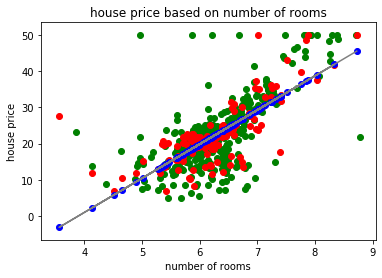

In [33]:
#Let's graph it:
#num_Rooms_Train, num_Rooms_Test, med_price_Train, med_Price_Test

import matplotlib.pyplot as plt
plt.scatter(num_Rooms_Train, med_price_Train, color = 'green')
plt.scatter(num_Rooms_Test, med_Price_Test, color = 'red')   
plt.scatter(num_Rooms_Test, med_price_pred, color = 'blue')  # The predicted temperatures of the same X_test input.
plt.plot(num_Rooms_Test, price_room.predict(num_Rooms_Test), color = 'gray')
plt.title('house price based on number of rooms')
plt.xlabel('number of rooms')
plt.ylabel('house price')
plt.show()

In [34]:
print('Coefficients: \n', price_room.coef_) 

Coefficients: 
 [[9.41046343]]


In [36]:
from sklearn.metrics import mean_squared_error,r2_score

print('Mean squared error: %.2f' %mean_squared_error(med_Price_Test, med_price_pred))
rmse = np.sqrt(mean_squared_error(med_Price_Test, med_price_pred))
print('Root MSE: %.2f' %rmse)




Mean squared error: 35.03
Root MSE: 5.92


In [ ]:
# starter for group exercise

In [38]:
from sklearn.datasets import fetch_california_housing

In [39]:
cali_h = fetch_california_housing()


In [40]:
print(type(cali_h))

<class 'sklearn.utils.Bunch'>


In [42]:
cali_h.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [47]:
print(cali_h.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [45]:
cali_features, cali_label = fetch_california_housing(return_X_y=True)

In [46]:
print(cali_features[0:5])

[[ 8.32520000e+00  4.10000000e+01  6.98412698e+00  1.02380952e+00
   3.22000000e+02  2.55555556e+00  3.78800000e+01 -1.22230000e+02]
 [ 8.30140000e+00  2.10000000e+01  6.23813708e+00  9.71880492e-01
   2.40100000e+03  2.10984183e+00  3.78600000e+01 -1.22220000e+02]
 [ 7.25740000e+00  5.20000000e+01  8.28813559e+00  1.07344633e+00
   4.96000000e+02  2.80225989e+00  3.78500000e+01 -1.22240000e+02]
 [ 5.64310000e+00  5.20000000e+01  5.81735160e+00  1.07305936e+00
   5.58000000e+02  2.54794521e+00  3.78500000e+01 -1.22250000e+02]
 [ 3.84620000e+00  5.20000000e+01  6.28185328e+00  1.08108108e+00
   5.65000000e+02  2.18146718e+00  3.78500000e+01 -1.22250000e+02]]


In [48]:
#pick a feature
#why are you picking this feature?

In [49]:
#split the features using numpy
#hint train = dataset[:-500]
#     test = dataset[-500:] 



In [50]:
#create and train a linear regressor

In [51]:
#print the coefficients, MSE, and RMSE

In [ ]:
#optional:
#graph it

In [ ]:
from sklearn.metrics import mean_squared_error,r2_scorefrom sklearn.metrics import mean_squared_error,r2_score

print('Mean squared error: %.2f' %mean_squared_error(diabetes_y_train, diabetes_y_pred))
rmse = np.sqrt(mean_squared_error(diabetes_y_train, diabetes_y_pred))
print('Root MSE: %.2f' %rmse)print('Mean squared error: %.2f' %mean_squared_error(diabetes_y_train, diabetes_y_pred))
rmse = np.sqrt(mean_squared_error(diabetes_y_train, diabetes_y_pred))
print('Root MSE: %.2f' %rmse)
